In [60]:

# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)


import pandas as pd
red_wine = pd.read_csv('../input/dl-course-data/red-wine.csv')
# red_wine = pd.read_csv("/kaggle/input/dl-course-data/red-wine.csv")


/tmp/ipykernel_33/1665976778.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [61]:
import sys
import os

# Añadir la ruta al directorio del archivo .py
sys.path.append('/kaggle/input/libraries/utils_reg_eval')
import Utils # pronto cambiaremos el nombre a eval_reg_utils

In [3]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Capturamos los datos tabulares

## 1) forma de obtener datos

In [3]:
# # Creatapplymape training and validation splits
# df_train = red_wine.sample(frac=0.7, random_state=0)
# df_valid = red_wine.drop(df_train.index)


# # Split features and target
# X_train = df_train.drop('quality', axis=1) # Axis = 1 significa columna
# X_valid = df_valid.drop('quality', axis=1) # Axis = 0 significa fila y quality en ese caso seria una etiqueta de indice
# y_train = df_train['quality']
# y_valid = df_valid['quality']

## 2) Segunda forma de capturar los datos

In [4]:
df = red_wine.copy()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
X = df
y = df.pop('quality')

KeyError: 'quality'

In [7]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

# Dividimos los datos gracias a la utilidad de sklearn train_test_split:
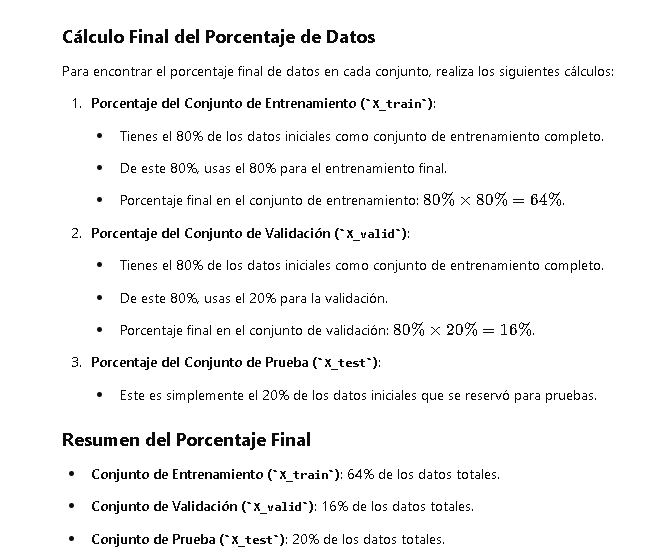

In [8]:
# from sklearn.model_selection import train_test_split

# X_train_full, X_test, y_train_full, y_test  = train_test_split(X, y, train_size = 0.8, random_state =1)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, train_size = 0.8, random_state = 1)

# # con ello tenemos los datos de entrenamiento, prueba y validacion

from sklearn.model_selection import train_test_split

# Primera división: conjunto de prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# Segunda división: conjunto de validación
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, train_size=0.8, random_state=1)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de validación: {X_valid.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")


Tamaño del conjunto de entrenamiento: 1023
Tamaño del conjunto de validación: 256
Tamaño del conjunto de prueba: 320


<!-- When adding dropout, you may need to increase the number of units in your `Dense` layers. -->
"Al agregar dropout, es posible que necesites aumentar el número de unidades en tus capas `Dense`."

In [9]:
input_shape = X_train.shape[1]
BATCH = 350
EPOCHS = 140
VERBOSE = 1 # 0 para no ver optimizacion de parametros 

In [42]:


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Lambda

def create_model(DROP = 0.22, DENSE = 1024):
    model = keras.Sequential([
#         layers.BatchNormalization(), # perjudico la generalizacion del modelo dandonos metricas de r2 peores
        layers.Dense(DENSE, activation='relu', input_shape=[input_shape]),
        layers.Dropout(DROP),
        layers.BatchNormalization(), # era el equivalente al standar scaler de scikitlearn
        layers.Dense(DENSE, activation='relu'),
        layers.Dropout(DROP),
        layers.BatchNormalization(),
        layers.Dense(DENSE, activation='relu'),
        layers.Dropout(DROP),
        layers.BatchNormalization(),
        layers.Dense(1),
    ])
    return model

model = create_model(0.25, 1000)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/140
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - loss: 5.6461 - val_loss: 7.1041
Epoch 2/140
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 5.5126 - val_loss: 10.6880
Epoch 3/140
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 5.4343 - val_loss: 6.6223
Epoch 4/140
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 5.2985 - val_loss: 11.5785
Epoch 5/140
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 5.1628 - val_loss: 5.8918
Epoch 6/140
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 4.9845 - val_loss: 8.4756
Epoch 7/140
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 4.8048 - val_loss: 12.7497
Epoch 8/140
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 4.6325 - val_loss: 11.1382
Epoch 9/140
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 4.4254 - val_loss: 8.2265
Epoch 10/140
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 4.2151 - val_loss: 5.0299
Epoch 11/140
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 3.9934 - val_loss: 5.6896
Epoch 12/140
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 3.7431 - v

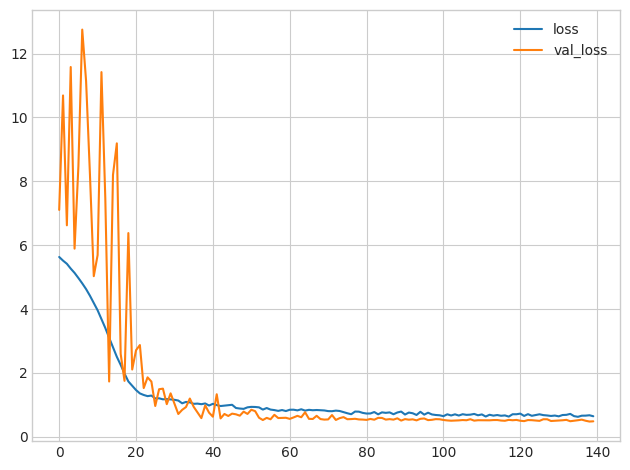

In [43]:
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid), 
    batch_size= BATCH,
    epochs= EPOCHS,
    verbose=VERBOSE,
) # usamos "validation_data=(X_valid, y_valid), " para poder monitorizar el rendimiento durrante el ajuste de parametros


# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

<!-- You'll typically get better performance if you standardize your data before using it for training. That we were able to use the raw data at all, however, shows how effective batch normalization can be on more difficult datasets.

# Your Turn #

Move on to [**improve predictions**](https://www.kaggle.com/kernels/fork/11887342) on the *Spotify* dataset with dropout and see how batch normalization can help with difficult datasets. -->
"Normalmente obtendrás un mejor rendimiento si estandarizas tus datos antes de usarlos para el entrenamiento. Sin embargo, el hecho de que hayamos podido usar los datos en bruto muestra lo efectivo que puede ser la normalización por lotes en conjuntos de datos más difíciles.

# Tu turno #

Continúa [**mejorando las predicciones**](https://www.kaggle.com/kernels/fork/11887342) en el conjunto de datos de *Spotify* con dropout y observa cómo la normalización por lotes puede ayudar con conjuntos de datos difíciles."

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/intro-to-deep-learning/discussion) to chat with other learners.*

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1000)           │        12,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1000)           │         4,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1000)           │     1,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1000)           │         4,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1000)           │     1,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 1000)           │         4,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │         1,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,069,005 (23.15 MB)

 Trainable params: 2,021,001 (7.71 MB)

 Non-trainable params: 6,000 (23.44 KB)

 Optimizer params: 4,042,004 (15.42 MB)

# Evaluamos la calidad del modelo: 


In [63]:
import Utils

# tenemos que calcular las pred.

from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE en conjunto de prueba y calculado con prediccion: {mae}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MAE en conjunto de prueba y calculado con prediccion: 0.44375


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


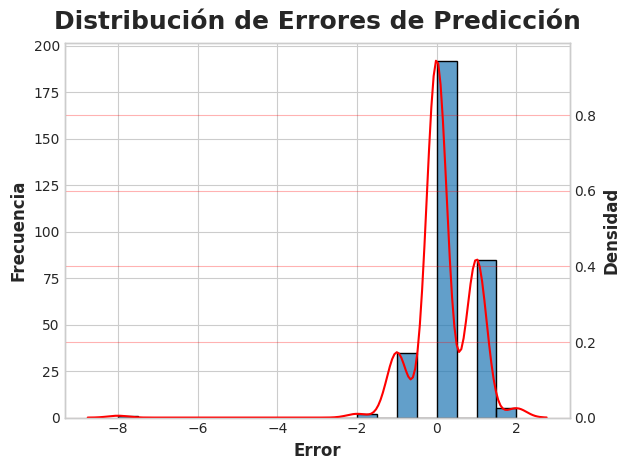

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MAE (mean absolute error) en conjunto de prueba y calculado con prediccion: 
--> 0.5043740928173065

Precisión relativa del modelo segun el mae y el rango de valores de la variable objetivo: 
-> 10.09%

MSE (Error Cuadrático Medio): 0.6625

RMSE (Raíz del Error Cuadrático Medio): 0.8139410298049853

R^2 (Coeficiente de Determinación): -0.16453523302720807


In [64]:
complete_reg_eval(model,X_test,y_test, y_pred)

In [65]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train)

from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_valid)
print("Mean Absolute Error: (valid)" + str(mean_absolute_error(predictions, y_valid)))

predictions = my_model.predict(X_test)
print("Mean Absolute Error: (test)" + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error: (valid)0.3976993467658758
Mean Absolute Error: (test)0.4324692144989967


MAE en conjunto de prueba y calculado con prediccion: 0.353125


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


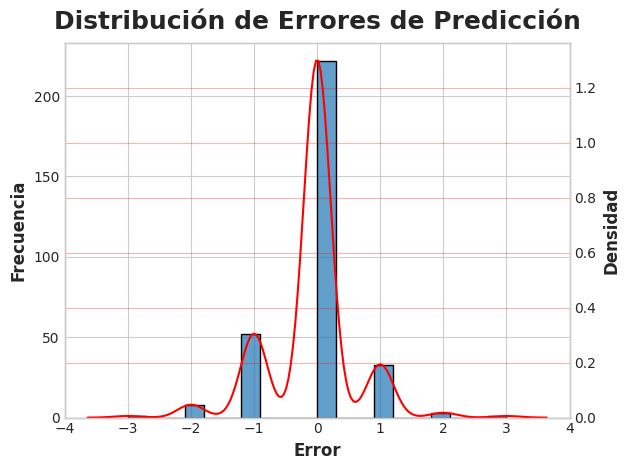

MAE (Error Absoluto Medio) en el conjunto de prueba: 
--> 0.4325

Según el MAE y el rango de valores de la variable objetivo
Precisión relativa del modelo: 
-> 91.35%

MAE (Error Absoluto Medio): 0.353125 --> 35.3125%

MSE (Error Cuadrático Medio): 0.459375 --> 45.9375%

RMSE (Raíz del Error Cuadrático Medio): 0.677772085586298 --> 67.7772085586298%

R^2 (Coeficiente de Determinación): 0.19251566389151142 --> 19.251566389151144%


In [68]:
y_pred = my_model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE en conjunto de prueba y calculado con prediccion: {mae}')
complete_reg_eval(my_model,X_test,y_test, y_pred)

# conclusion XGboost es mucho mas preciso

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

#from visualization_utils import plot_error_distribution
def plot_error_distribution(y_true, y_pred):
    """
    Esta función toma los valores verdaderos y las predicciones, calcula el error,
    y muestra un gráfico con un histograma de errores y una curva KDE de la densidad.
    
    :param y_true: Array de valores verdaderos.
    :param y_pred: Array de valores predichos.
    """
    # Calcular errores
    errors = y_true - y_pred.flatten()

    # Crear la figura y el eje principal
    fig, ax1 = plt.subplots()

    # Crear el histograma en el eje principal
    sns.histplot(errors, bins=20, edgecolor='k', alpha=0.7, ax=ax1)
    ax1.set_xlabel('Error')
    ax1.set_ylabel('Frecuencia')
    ax1.set_title('Distribución de Errores de Predicción')

    # Crear un segundo eje que comparte el mismo eje x
    ax2 = ax1.twinx()

    # Crear el KDE en el segundo eje
    sns.kdeplot(errors, ax=ax2, color='r')
    ax2.set_ylabel('Densidad')

    # Modificar la grilla del eje y de la derecha
    ax2.grid(True, which='both', axis='y', color='r', alpha=0.3)

    # Mostrar el gráfico
    plt.show()

# Ejemplo de uso
# plot_error_distribution(y_test, y_pred)

from sklearn.metrics import mean_absolute_error

def reg_evaluation(model, X_test, y_test, verbose=False):
    """
    Evalúa el rendimiento de un modelo de regresión en términos de MAE y precisión relativa.

    Parámetros:
    model: El modelo de regresión entrenado.
    X_test: Características del conjunto de prueba.
    y_test: Valores verdaderos del conjunto de prueba.
    verbose: Si es True, retorna las predicciones y las métricas de evaluación.

    Retorna:
    Opcionalmente, las predicciones, el MAE en porcentaje y el MAE absoluto si verbose=True.
    """
    # Hacer predicciones
    y_pred = model.predict(X_test)
    
    # Calcular MAE
    mae = mean_absolute_error(y_test, y_pred)
    print(f'MAE (Error Absoluto Medio) en el conjunto de prueba: \n--> {mae:.4f}\n')

    # Calcular el rango de los valores objetivo
    y_range = y_test.max() - y_test.min()

    # Calcular el MAE en porcentaje
    mae_percentage = 100-((mae / y_range) * 100)
    print("Según el MAE y el rango de valores de la variable objetivo")
    print(f'Precisión relativa del modelo: \n-> {mae_percentage:.2f}%')

    if verbose:
        return y_pred, mae_percentage, mae


#------

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def more_reg_eval(y_test, y_pred):
    """
    Calcula y muestra métricas de evaluación para un modelo de regresión.

    Parámetros:
    y_test (array-like): Valores reales del conjunto de prueba.
    y_pred (array-like): Predicciones realizadas por el modelo sobre el conjunto de prueba.

    Métricas Calculadas:
    - MAE (Error Absoluto Medio): Mide el promedio de los errores absolutos entre las predicciones y los valores reales.
    - MSE (Error Cuadrático Medio): Calcula el promedio de los cuadrados de los errores.
    - RMSE (Raíz del Error Cuadrático Medio): Proporciona una medida del error en las mismas unidades que los datos.
    - R^2 (Coeficiente de Determinación): Mide la proporción de la varianza en la variable dependiente que es explicada por el modelo.

    Resultados:
    Imprime las métricas MAE, MSE, RMSE y R^2 en la consola.
    """
    # Calcular MAE
    mae = mean_absolute_error(y_test, y_pred)
    
    # Calcular MSE
    mse = mean_squared_error(y_test, y_pred)
    
    # Calcular RMSE
    rmse = np.sqrt(mse)
    
    # Calcular R^2
    r2 = r2_score(y_test, y_pred)
    
    # Imprimir resultados
    print(f'\nMAE (Error Absoluto Medio): {mae} --> {mae*100}%')
    print(f'\nMSE (Error Cuadrático Medio): {mse} --> {mse*100}%')
    print(f'\nRMSE (Raíz del Error Cuadrático Medio): {rmse} --> {rmse*100}%')
    print(f'\nR^2 (Coeficiente de Determinación): {r2} --> {r2*100}%')


def complete_reg_eval(model, X_test, y_test, y_pred):
    """
    Evalúa y presenta el rendimiento del modelo de regresión mediante diferentes métricas y visualizaciones.

    Parámetros:
    model: El modelo de regresión que se está evaluando.
    X_test (array-like): Datos de entrada del conjunto de prueba.
    y_test (array-like): Valores reales del conjunto de prueba.
    y_pred (array-like): Predicciones realizadas por el modelo sobre el conjunto de prueba.

    Funcionalidad:
    - Visualiza la distribución de errores mediante un gráfico.
    - Evalúa el modelo con métricas de rendimiento como MAE, MSE, RMSE y R^2.
    - Calcula y muestra métricas adicionales de evaluación del modelo.

    Uso:
    Llama a esta función con el modelo, el conjunto de prueba y las predicciones para obtener un análisis completo del rendimiento.
    """
    # Visualizar la distribución de errores
    plot_error_distribution(y_test, y_pred)
    
    # Evaluar el modelo con métricas de rendimiento
    reg_evaluation(model, X_test, y_test)
    
    # Calcular y mostrar métricas adicionales
    more_reg_eval(y_test, y_pred)
    
#complete_reg_eval(model,X_test,y_test, y_pred)


---

### Posible Razón del Fracaso del Modelo de Deep Learning

El desempeño insatisfactorio del modelo de deep learning (DL) probablemente se debe a una confusión en la naturaleza del problema. Este problema se centra en **clasificación multiclase**, donde el objetivo es asignar datos a una de varias categorías discretas, como las diferentes calidades del vino. Sin embargo, la arquitectura actual del modelo de DL, que está diseñada para regresión, no se adapta a este tipo de problema.

En un problema de clasificación multiclase, es esencial que el modelo use una capa de salida adecuada con activación `softmax` para predecir probabilidades de clase y una función de pérdida específica como `categorical_crossentropy`. La falta de estas adaptaciones puede hacer que el modelo no capture adecuadamente las características importantes de los datos, lo que lleva a una evaluación deficiente y a una menor capacidad de generalización.

**Solución Recomendada:** Ajustar la arquitectura del modelo para clasificación multiclase, modificando la capa de salida y la función de pérdida para que el modelo pueda aprender a predecir las categorías discretas en lugar de valores continuos.

--- 

Sin embargo Xgboost si logro adaptarse, pese a mi equivocacion.

Es un todo terreno 

XGBoost puede adaptarse eficazmente a problemas de clasificación multiclase debido a su capacidad para manejar datos no lineales, su implementación de técnicas específicas para clasificación, su manejo de datos desbalanceados y su optimización eficiente. En comparación, un modelo de deep learning puede requerir ajustes significativos en su arquitectura y funciones de pérdida para abordar adecuadamente un problema de clasificación multiclase.